In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## H1B Analysis - Kaggle Dataset
Notebook for exploratory data analysis<br>
Data found here: https://www.kaggle.com/nsharan/h-1b-visa/data. <br>
Starting with the questions in the 'Inspriation' section found here: https://www.kaggle.com/nsharan/h-1b-visa

1) Is the number of petitions with Data Engineer job title increasing over time? <br>
2) Which part of the US has the most Hardware Engineer jobs? <br>
3) Which industry has the most number of Data Scientist positions? <br> 
4) Which employers file the most petitions each year?

I use the questions above as a starting point for the analysis.

In [141]:
file = 'h1b_kaggle.csv'

In [142]:
df = pd.read_csv(file,index_col=0)

/usr/local/lib/python3.5/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [143]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


<h5> Looking at Data Engineering H-1B applications

In [144]:
df_eng = df[df.JOB_TITLE.str.contains('DATA ENGINEER', na=False)]

In [145]:
df_eng.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
8239,CERTIFIED,"AMAZON WEB SERVICES, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,DATA ENGINEERING MANAGER III,Y,103875.0,2016.0,"SEATTLE, WASHINGTON",-122.332071,47.606209
8670,CERTIFIED,EMC CORPORATION,COMPUTER AND INFORMATION SYSTEMS MANAGERS,"MANAGER, DATA ENGINEERING",Y,118414.0,2016.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
8824,CERTIFIED,EMC CORPORATION,COMPUTER AND INFORMATION SYSTEMS MANAGERS,"MANAGER, DATA ENGINEERING",Y,138133.0,2016.0,"NEW YORK, NEW YORK",-74.005941,40.712784
9340,CERTIFIED,"MYFITNESSPAL, INC.",COMPUTER AND INFORMATION SYSTEMS MANAGERS,HEAD OF DATA ENGINEERING & SCIENCE,Y,173056.0,2016.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
9536,CERTIFIED,CEB INC.,COMPUTER AND INFORMATION SYSTEMS MANAGERS,"DIRECTOR, BIG DATA ENGINEERING",Y,92373.0,2016.0,"CHAMPAIGN, ILLINOIS",-88.243383,40.116420


In [146]:
print ('total data engineering applications 2011-2016: {0}'.format(len(df_eng)))

total data engineering applications 2011-2016: 1721


In [147]:
df_eng.YEAR = [int(i) for i in df_eng.YEAR]
df_eng.groupby('YEAR').JOB_TITLE.count()

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


YEAR
2011     60
2012     81
2013    151
2014    249
2015    394
2016    786
Name: JOB_TITLE, dtype: int64

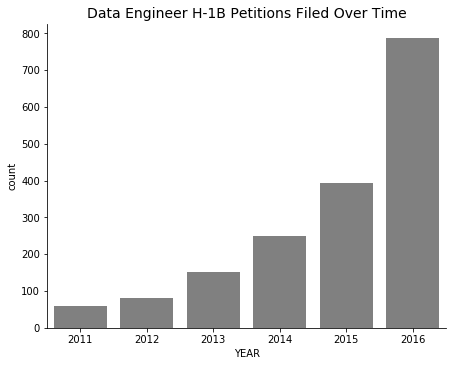

In [275]:
sns.factorplot('YEAR',data=df_eng,kind='count',size=5,aspect=1.25,color='grey')
plt.title('Data Engineer H-1B Petitions Filed Over Time',fontsize=14);

The plot above shows the growth in H-1B petitions for Data Engineer based roles.

In [120]:
print ('Annual growth rate over time: {0} % per year'.format(np.round(((786/60.0)**(1/6.0) - 1) * 100)))

Annual growth rate over time: 54.0 % per year


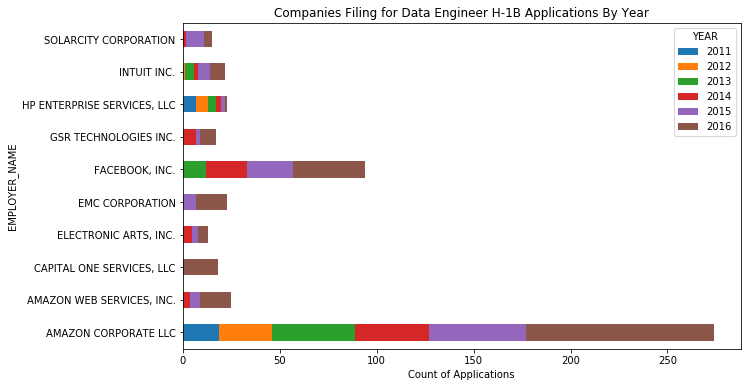

In [296]:
fig,ax = plt.subplots(figsize=(10,6))
df_eng[df_eng.EMPLOYER_NAME.isin(df_eng.groupby(['EMPLOYER_NAME']).count().sort_values(
        by=['CASE_STATUS'],ascending=False).head(10).index)].groupby(
    ['EMPLOYER_NAME','YEAR']).count().sort_values(
    by=['CASE_STATUS'],ascending=False).CASE_STATUS.unstack().plot.barh(stacked=True,ax=ax)
ax.set_xlabel('Count of Applications')
ax.set_title('Companies Filing for Data Engineer H-1B Applications By Year');

The stacked bar chart above shows the number of H-1B applications for roles with 'Data Engineering' in the title over the past 6 years. Other than perhaps Facebook (94 applications total from 2011 - 2016), no other company even comes close to Amazon (274 applications from 2011-2016). A shocking statistic I didn't realize until looking into Amazon is that the corporation has over *half a million employees* as of 2017 (https://en.wikipedia.org/wiki/Amazon_(company)) - 541,900 according to Wikipedia. Looking at Data Engineering H-1B applications per employee between Facebook and Amazon:<br>

*Amazon*
* 274 / 514900 = 0.05% (or about 1 in every 2000 employees)<br>

*Facebook*
* 94 / 20658 = 0.46% (or about 1 in every 200 employees)

When looking at the relative company sizes, Facebook actually files 10x the number Data Engineering H-1B applications than Amazon relative to company size.

*note*: Amazon has a number of subsidiaries, and I'm assuming all 514,900 fall under 'Amazon Corporate LLC', which is likely not true but I can't find the actual employee breakdown

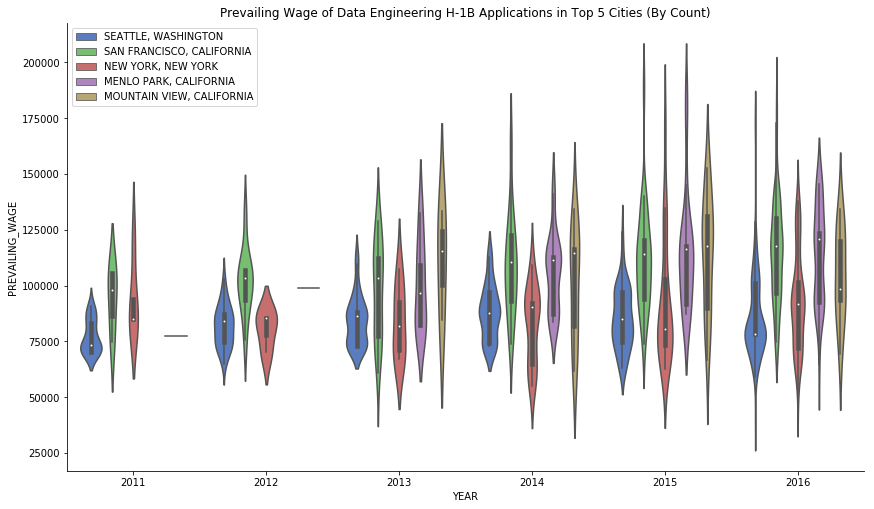

In [254]:
ax = sns.factorplot('YEAR','PREVAILING_WAGE',
               data=df_eng[(df_eng.PREVAILING_WAGE<750000) & (df_eng.WORKSITE.isin(
                   df_eng.WORKSITE.value_counts(ascending=False)[0:5].index))],
               hue='WORKSITE',kind='violin',size=7,aspect=1.75,legend=False,
              palette="muted");

plt.legend(loc='upper left')
plt.title('Prevailing Wage of Data Engineering H-1B Applications in Top 5 Cities (By Count)');

In [301]:
df_eng[df_eng.WORKSITE.isin(
    df_eng.WORKSITE.value_counts(ascending=False)[0:5].index)].groupby(
    ['WORKSITE','YEAR']).mean().PREVAILING_WAGE.unstack().round(2)

YEAR,2011,2012,2013,2014,2015,2016
WORKSITE,,,,,,
"MENLO PARK, CALIFORNIA",NaN,NaN,99844.17,105693.81,114625.22,113698.54
"MOUNTAIN VIEW, CALIFORNIA",77646.00,98987.00,111266.33,100620.92,114552.28,104481.96
"NEW YORK, NEW YORK",93849.75,80406.00,83671.50,82700.78,92306.44,93326.39
"SAN FRANCISCO, CALIFORNIA",94151.00,101606.90,98134.00,108597.59,111386.03,114228.37
"SEATTLE, WASHINGTON",77352.25,81875.63,84285.43,88143.29,85462.39,85937.83


Looking at the median prevailing wage in the H-1B applications and focusing on the top 5 cities by count of applicants with 'data engineering' in the title, a noticable wage discrepancy pops out. Median salaries for data engineering roles in Seattle, Washington are between 20,000 - 30,000 lower than in Silicon Valley. Even the median wage in New York is ~10,000 - 20,000 lower than Silicon Valley. Some of this could be chalked up to the higher cost of living and demand for highly skilled data engineers in the Bay Area.

<h5> Now looking at hardware engineering applicants

In [117]:
df_heng = df[df.JOB_TITLE.str.contains('HARDWARE ENGINEER',na=False)]

In [118]:
df_heng.WORKSITE.value_counts()[0:10]

SAN DIEGO, CALIFORNIA        2688
SANTA CLARA, CALIFORNIA       729
SAN JOSE, CALIFORNIA          512
FOLSOM, CALIFORNIA            405
RALEIGH, NORTH CAROLINA       344
AUSTIN, TEXAS                 211
MOUNTAIN VIEW, CALIFORNIA     190
SUNNYVALE, CALIFORNIA         113
HILLSBORO, OREGON              98
CHANDLER, ARIZONA              94
Name: WORKSITE, dtype: int64

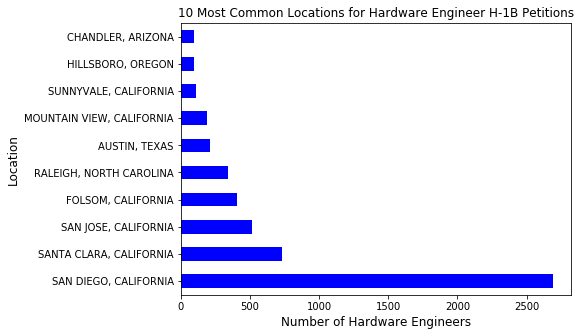

In [119]:
fig,ax = plt.subplots(figsize=(7,5))
df_heng.WORKSITE.value_counts()[0:10].plot(kind='barh',ax=ax,color='blue')
ax.set_xlabel('Number of Hardware Engineers',fontsize=12)
ax.set_ylabel('Location',fontsize=12)
ax.set_title('10 Most Common Locations for Hardware Engineer H-1B Petitions');

Interestingly, San Diego is the most popular location for hardware engineers. Also surprised to see Chandler AZ on the top 10 list. Not surprised to see Santa Clara, Mountain View or Sunnyvale (popular cities in 'Silicon Valley'). Let's look a little closer at why San Diego is the top spot for hardware engineering

In [27]:
df_qual = df_heng[(df_heng.WORKSITE == 'SAN DIEGO, CALIFORNIA') & (df_heng.EMPLOYER_NAME == 'QUALCOMM TECHNOLOGIES, INC.')]
df_qual.PREVAILING_WAGE.describe() # median wage $91,000, total applications of 1604 from 2011 - 2016

count    1.604000e+03
mean     2.032287e+05
std      4.340884e+06
min      6.344000e+04
25%      8.887840e+04
50%      9.108320e+04
75%      1.021904e+05
max      1.739462e+08
Name: PREVAILING_WAGE, dtype: float64

After digging a little deeper, the majority of hardware engineers filing for a visa in San Diego work for Qualcomm. Qualcomm is one of the largest semiconductor companies in the world, and is headquarted in San Diego. Their operations in San Diego support a lot of high paying jobs, with 1604 H1B applicants with a mediam prevailing wage of 91,000 USD. Here's a good article outlining the impact of the company for San Diego: http://www.sandiegouniontribune.com/business/economy/sd-fi-qualcomm-impact-20171117-story.html

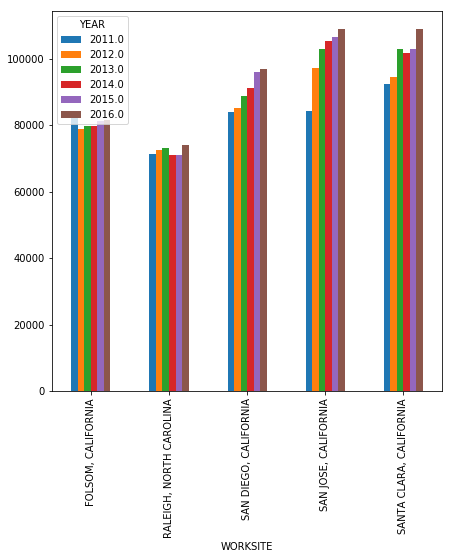

In [419]:
fig,ax = plt.subplots(figsize=(7,7))
df_heng[
    (df_heng.WORKSITE.isin(df_heng.WORKSITE.value_counts()[0:5].index)) &
    (df_heng.PREVAILING_WAGE<750000)].groupby(
    ['WORKSITE','YEAR']).median().PREVAILING_WAGE.unstack().plot(kind='bar',ax=ax)

In [384]:
df_heng_top5 = df_heng[
    (df_heng.WORKSITE.isin(df_heng.WORKSITE.value_counts()[0:5].index)) &
    (df_heng.PREVAILING_WAGE<750000)].groupby(['WORKSITE','YEAR']).median().PREVAILING_WAGE.unstack()
df_heng_top5

YEAR,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
WORKSITE,,,,,,
"FOLSOM, CALIFORNIA",83179.0,78781.0,79702.0,79792.0,81321.0,81585.0
"RALEIGH, NORTH CAROLINA",71198.0,72384.0,73112.0,70886.4,71074.0,73986.0
"SAN DIEGO, CALIFORNIA",83907.0,85051.2,88878.4,91083.2,95930.0,96970.0
"SAN JOSE, CALIFORNIA",84176.0,97170.0,102731.2,105394.0,106517.0,108992.0
"SANTA CLARA, CALIFORNIA",92331.0,94432.0,102731.2,101691.0,102731.2,108992.0


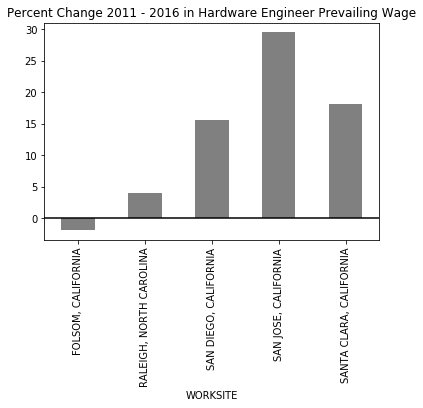

In [416]:
df_heng_top5['pct_change']=((df_heng_top5[2016.0]-df_heng_top5[2011.0])/df_heng_top5[2011.0])*100
df_heng_top5['pct_change'].plot(kind='bar',color='grey')
plt.axhline(y=0,color='k')
plt.title('Percent Change 2011 - 2016 in Hardware Engineer Prevailing Wage');

In [411]:
df_heng_top5['pct_change'].round(0)

WORKSITE
FOLSOM, CALIFORNIA         -2.0
RALEIGH, NORTH CAROLINA     4.0
SAN DIEGO, CALIFORNIA      16.0
SAN JOSE, CALIFORNIA       29.0
SANTA CLARA, CALIFORNIA    18.0
Name: pct_change, dtype: float64

For hardware engineering H-1B applicants, the prevailing wage is ~35,000 lower in Raleigh than in the Bay Area. Also, from 2011 - 2016, prevailing wages for hardware engineers have decreaed by 2% in Folsom and increased by only 4% in Raleigh compared to a staggering 29% increase in San Jose. 

<h5> Looking into Data Scientist H-1B applications

In [412]:
df_ds = df[df.JOB_TITLE.str.contains('DATA SCIEN',na=False)]
df_ds.SOC_NAME = [str(i).upper() for i in df_ds.SOC_NAME]

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


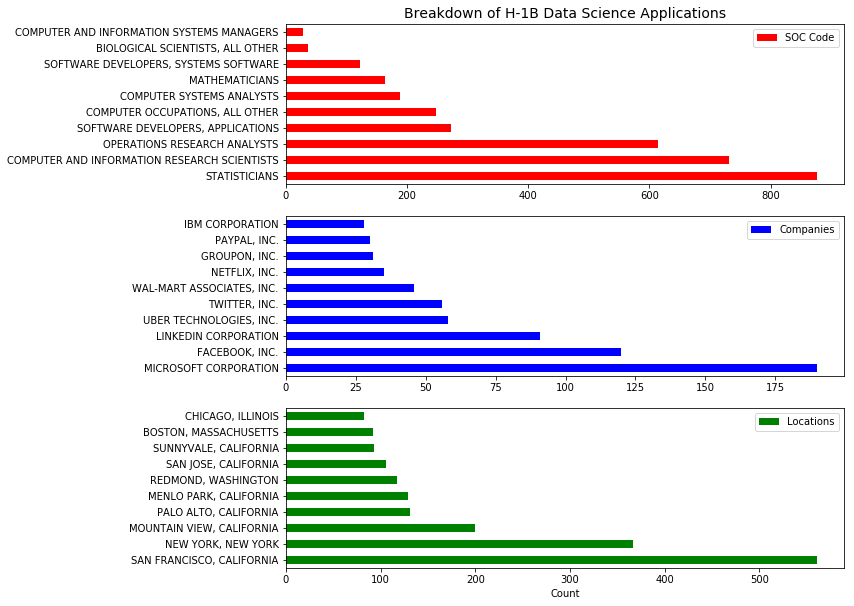

In [413]:
fig,ax = plt.subplots(3,figsize=(10,10))
df_ds.SOC_NAME.value_counts()[0:10].plot(kind='barh',color='red',ax=ax[0],label='SOC Code')
ax[0].legend()
df_ds.EMPLOYER_NAME.value_counts()[0:10].plot(kind='barh',color='blue',ax=ax[1],label='Companies')
ax[1].legend()
df_ds.WORKSITE.value_counts()[0:10].plot(kind='barh',color='green',ax=ax[2],label='Locations')
ax[2].legend()
ax[2].set_xlabel('Count');
ax[0].set_title('Breakdown of H-1B Data Science Applications',fontsize=14);

The plot above shows the brekadown for 'Data Scientist' H-1B applicants by SOC, company, and location. <br><br>
The SOC code is a more broad classification for certain job titles (see https://www.bls.gov/soc/). Statistician, Computer Sciencist and Operations Reasearcher dominated the top industry categories for data scientists filing for H-1B. <br>

The most common company filing for data scientist roles over the past 6 years has been Microsoft, followed by Facebook, LinkedIn and Uber. It is a little surprising not to see Apple, Google (Alphabet?), or Amazon crack the top 10.<br>

The two most popular locations are unsurprisingly San Francisco and New York. Also not very surprising to see Silicon Valley cities take up 6 of the top 10 locations for Data Scienctist H-1b applications.

<h5> looking at the companies that have been filing the most applications over the past 6 years

In [414]:
df_temp = df.groupby(['YEAR','EMPLOYER_NAME']).CASE_STATUS.count()
xticks = ['2011','2012','2013','2014','2015','2016']

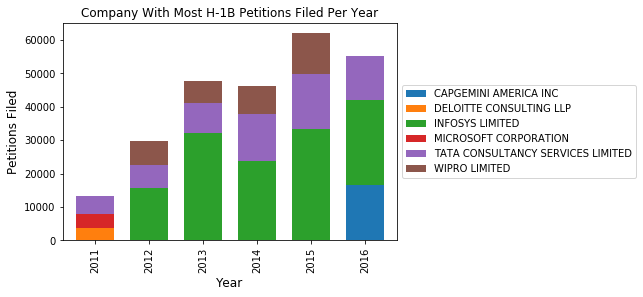

In [415]:
fig,ax = plt.subplots()
df_temp.groupby(level='YEAR').nlargest(3).reset_index(level=0, drop=True)\
                            .unstack(level=1).plot(kind='bar',ax=ax, width=0.7, align='center',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Petitions Filed', fontsize = 12)
ax.set_xlabel('Year', fontsize = 12)
ax.set_xticklabels(xticks)
ax.set_title('Company With Most H-1B Petitions Filed Per Year');

The plot above shows the count for the 3 companies that have filed the most H-1b applications over the past 6 years. We can see a large increase in applications from Infosys, Tata Consultancy Services and Capgemini America over the 6 year period. Interestingly, the US government has taken notice and claimed that these companies (specifically Infosys and Tata) are flooding the lottery with tickets to increase the chance one of their employees will be selected (http://www.livemint.com/Industry/usXzJgxnGlzj9OU3SQex7J/US-accuses-TCS-Infosys-and-Cognizant-of-violating-H1B-vis.html). 